In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchview import draw_graph
import os

from common import h5dataset, onnxexporter, model_dnn, trainer


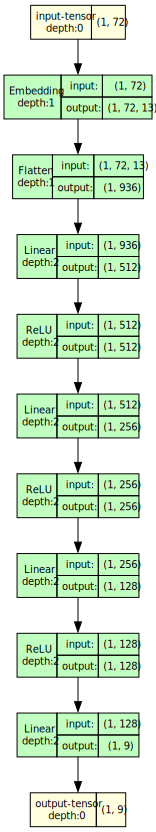

In [2]:
# Plot model graph
model = model_dnn.ModelDNN(
    name="Jass",
    input_size=72,
    embedding_size=13,
    hidden_size=[512, 256, 128],
    output_size=9,
)
model_graph = draw_graph(model, torch.zeros(1, 72).long(), show_shapes=True)
model_graph.visual_graph

In [3]:
DATASET_PATH = '../log_parser/dataset/flat_playing.hdf5'
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATASET_PATH}")

MODLE_PATH = './models/play'
if not os.path.exists(MODLE_PATH):
    os.makedirs(MODLE_PATH)

LOGS_PATH = './logs/play'
if not os.path.exists(LOGS_PATH):
    os.makedirs(LOGS_PATH)

In [4]:
BATCH_SIZE = 256
NUM_EPOCHS = 20
LEARNING_RATE = 1e-3
SEED = 42

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
dataset = h5dataset.H5Dataset(DATASET_PATH)
train_dataset, val_dataset = dataset.split(0.8)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

model_sizes = [
    [256, 128],
    [512, 256],
    [1024, 512],
    [256, 128, 64],
    [512, 256, 128],
    [1024, 512, 256],
    [256, 128, 64, 32],
    [512, 256, 128, 64],
    [1024, 512, 256, 128]
]

accuracy_fn = lambda y_pred, y_true: (y_pred.argmax(dim=1) == y_true).float().mean()
loss_fn = lambda y_pred, y_true: F.nll_loss(F.log_softmax(y_pred, dim=1), y_true)

# set up trainer
trainer = trainer.Trainer(
    train_loader=train_loader,
    val_loader=val_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    model_path=MODLE_PATH,
    device=device
)

Using device: cuda


In [5]:
# train the model
for model_size in model_sizes:
    model = model_dnn.ModelDNN(
        name="JassPlay",
        input_size=72,
        embedding_size=13,
        hidden_size=model_size,
        output_size=9,
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    trainer.train(NUM_EPOCHS, model, optimizer)

Training model: JassPlay_256_128_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:02<00:00, 278.88it/s]


Epoch 1/20 - Train Loss: 0.7741, Train Accuracy: 67.5863, Val Loss: 0.7062, Val Accuracy: 70.5678
Model saved at epoch 1 with validation loss 0.7062


Validation Epoch 2: 100%|██████████| 17333/17333 [01:05<00:00, 263.44it/s]


Epoch 2/20 - Train Loss: 0.6839, Train Accuracy: 71.6000, Val Loss: 0.6704, Val Accuracy: 72.3130
Model saved at epoch 2 with validation loss 0.6704


Validation Epoch 3: 100%|██████████| 17333/17333 [01:02<00:00, 276.17it/s]


Epoch 3/20 - Train Loss: 0.6565, Train Accuracy: 72.9120, Val Loss: 0.6484, Val Accuracy: 73.3255
Model saved at epoch 3 with validation loss 0.6484


Validation Epoch 4: 100%|██████████| 17333/17333 [01:02<00:00, 277.54it/s]


Epoch 4/20 - Train Loss: 0.6409, Train Accuracy: 73.6432, Val Loss: 0.6384, Val Accuracy: 73.7995
Model saved at epoch 4 with validation loss 0.6384


Validation Epoch 5: 100%|██████████| 17333/17333 [01:02<00:00, 277.46it/s]


Epoch 5/20 - Train Loss: 0.6306, Train Accuracy: 74.1331, Val Loss: 0.6286, Val Accuracy: 74.2238
Model saved at epoch 5 with validation loss 0.6286


Validation Epoch 6: 100%|██████████| 17333/17333 [01:02<00:00, 278.87it/s]


Epoch 6/20 - Train Loss: 0.6234, Train Accuracy: 74.4729, Val Loss: 0.6213, Val Accuracy: 74.5595
Model saved at epoch 6 with validation loss 0.6213


Validation Epoch 7: 100%|██████████| 17333/17333 [01:03<00:00, 273.23it/s]


Epoch 7/20 - Train Loss: 0.6185, Train Accuracy: 74.6908, Val Loss: 0.6195, Val Accuracy: 74.6658
Model saved at epoch 7 with validation loss 0.6195


Validation Epoch 8: 100%|██████████| 17333/17333 [01:01<00:00, 281.32it/s]


Epoch 8/20 - Train Loss: 0.6150, Train Accuracy: 74.8553, Val Loss: 0.6184, Val Accuracy: 74.7160
Model saved at epoch 8 with validation loss 0.6184


Validation Epoch 9: 100%|██████████| 17333/17333 [01:01<00:00, 280.29it/s]


Epoch 9/20 - Train Loss: 0.6122, Train Accuracy: 74.9929, Val Loss: 0.6147, Val Accuracy: 74.8947
Model saved at epoch 9 with validation loss 0.6147


Validation Epoch 10: 100%|██████████| 17333/17333 [01:02<00:00, 278.89it/s]


Epoch 10/20 - Train Loss: 0.6099, Train Accuracy: 75.1068, Val Loss: 0.6116, Val Accuracy: 75.0773
Model saved at epoch 10 with validation loss 0.6116


Validation Epoch 11: 100%|██████████| 17333/17333 [01:02<00:00, 277.13it/s]


Epoch 11/20 - Train Loss: 0.6077, Train Accuracy: 75.2213, Val Loss: 0.6108, Val Accuracy: 75.0724
Model saved at epoch 11 with validation loss 0.6108


Validation Epoch 12: 100%|██████████| 17333/17333 [01:02<00:00, 276.98it/s]


Epoch 12/20 - Train Loss: 0.6058, Train Accuracy: 75.3052, Val Loss: 0.6078, Val Accuracy: 75.2399
Model saved at epoch 12 with validation loss 0.6078


Validation Epoch 13: 100%|██████████| 17333/17333 [01:01<00:00, 281.77it/s]


Epoch 13/20 - Train Loss: 0.6042, Train Accuracy: 75.3924, Val Loss: 0.6063, Val Accuracy: 75.3132
Model saved at epoch 13 with validation loss 0.6063


Validation Epoch 14: 100%|██████████| 17333/17333 [01:00<00:00, 286.49it/s]


Epoch 14/20 - Train Loss: 0.6028, Train Accuracy: 75.4645, Val Loss: 0.6080, Val Accuracy: 75.2745


Validation Epoch 15: 100%|██████████| 17333/17333 [01:01<00:00, 280.67it/s]


Epoch 15/20 - Train Loss: 0.6016, Train Accuracy: 75.5203, Val Loss: 0.6063, Val Accuracy: 75.3367


Validation Epoch 16: 100%|██████████| 17333/17333 [01:01<00:00, 281.32it/s]


Epoch 16/20 - Train Loss: 0.6006, Train Accuracy: 75.5695, Val Loss: 0.6047, Val Accuracy: 75.4343
Model saved at epoch 16 with validation loss 0.6047


Validation Epoch 17: 100%|██████████| 17333/17333 [01:02<00:00, 278.36it/s]


Epoch 17/20 - Train Loss: 0.5997, Train Accuracy: 75.6103, Val Loss: 0.6040, Val Accuracy: 75.4273
Model saved at epoch 17 with validation loss 0.6040


Validation Epoch 18: 100%|██████████| 17333/17333 [01:01<00:00, 280.70it/s]


Epoch 18/20 - Train Loss: 0.5989, Train Accuracy: 75.6546, Val Loss: 0.6052, Val Accuracy: 75.3754


Validation Epoch 19: 100%|██████████| 17333/17333 [01:02<00:00, 276.42it/s]


Epoch 19/20 - Train Loss: 0.5981, Train Accuracy: 75.6936, Val Loss: 0.6069, Val Accuracy: 75.4177
Training model: JassPlay_512_256_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:01<00:00, 280.90it/s]


Epoch 1/20 - Train Loss: 0.7338, Train Accuracy: 69.3449, Val Loss: 0.6585, Val Accuracy: 72.7902
Model saved at epoch 1 with validation loss 0.6585


Validation Epoch 2: 100%|██████████| 17333/17333 [01:01<00:00, 283.12it/s]


Epoch 2/20 - Train Loss: 0.6348, Train Accuracy: 73.8360, Val Loss: 0.6205, Val Accuracy: 74.5534
Model saved at epoch 2 with validation loss 0.6205


Validation Epoch 3: 100%|██████████| 17333/17333 [01:01<00:00, 284.02it/s]


Epoch 3/20 - Train Loss: 0.6093, Train Accuracy: 75.0243, Val Loss: 0.6019, Val Accuracy: 75.3774
Model saved at epoch 3 with validation loss 0.6019


Validation Epoch 4: 100%|██████████| 17333/17333 [01:01<00:00, 282.73it/s]


Epoch 4/20 - Train Loss: 0.5957, Train Accuracy: 75.6596, Val Loss: 0.5951, Val Accuracy: 75.7074
Model saved at epoch 4 with validation loss 0.5951


Validation Epoch 5: 100%|██████████| 17333/17333 [01:01<00:00, 281.48it/s]


Epoch 5/20 - Train Loss: 0.5873, Train Accuracy: 76.0486, Val Loss: 0.5874, Val Accuracy: 76.0647
Model saved at epoch 5 with validation loss 0.5874


Validation Epoch 6: 100%|██████████| 17333/17333 [01:02<00:00, 277.19it/s]


Epoch 6/20 - Train Loss: 0.5818, Train Accuracy: 76.2821, Val Loss: 0.5842, Val Accuracy: 76.2185
Model saved at epoch 6 with validation loss 0.5842


Validation Epoch 7: 100%|██████████| 17333/17333 [01:02<00:00, 277.84it/s]


Epoch 7/20 - Train Loss: 0.5780, Train Accuracy: 76.4657, Val Loss: 0.5808, Val Accuracy: 76.3116
Model saved at epoch 7 with validation loss 0.5808


Validation Epoch 8: 100%|██████████| 17333/17333 [01:01<00:00, 280.71it/s]


Epoch 8/20 - Train Loss: 0.5751, Train Accuracy: 76.5920, Val Loss: 0.5802, Val Accuracy: 76.3834
Model saved at epoch 8 with validation loss 0.5802


Validation Epoch 9: 100%|██████████| 17333/17333 [01:01<00:00, 283.29it/s]


Epoch 9/20 - Train Loss: 0.5728, Train Accuracy: 76.6923, Val Loss: 0.5780, Val Accuracy: 76.4584
Model saved at epoch 9 with validation loss 0.5780


Validation Epoch 10: 100%|██████████| 17333/17333 [01:01<00:00, 282.84it/s]


Epoch 10/20 - Train Loss: 0.5710, Train Accuracy: 76.7771, Val Loss: 0.5764, Val Accuracy: 76.5583
Model saved at epoch 10 with validation loss 0.5764


Validation Epoch 11: 100%|██████████| 17333/17333 [01:01<00:00, 281.69it/s]


Epoch 11/20 - Train Loss: 0.5695, Train Accuracy: 76.8564, Val Loss: 0.5752, Val Accuracy: 76.6023
Model saved at epoch 11 with validation loss 0.5752


Validation Epoch 12: 100%|██████████| 17333/17333 [00:59<00:00, 290.90it/s]


Epoch 12/20 - Train Loss: 0.5683, Train Accuracy: 76.9139, Val Loss: 0.5755, Val Accuracy: 76.6396


Validation Epoch 13: 100%|██████████| 17333/17333 [01:01<00:00, 279.98it/s]


Epoch 13/20 - Train Loss: 0.5673, Train Accuracy: 76.9649, Val Loss: 0.5735, Val Accuracy: 76.6838
Model saved at epoch 13 with validation loss 0.5735


Validation Epoch 14: 100%|██████████| 17333/17333 [01:04<00:00, 269.89it/s]


Epoch 14/20 - Train Loss: 0.5664, Train Accuracy: 77.0015, Val Loss: 0.5750, Val Accuracy: 76.6892


Validation Epoch 15: 100%|██████████| 17333/17333 [00:56<00:00, 306.43it/s]


Epoch 15/20 - Train Loss: 0.5657, Train Accuracy: 77.0362, Val Loss: 0.5744, Val Accuracy: 76.6730


Validation Epoch 16: 100%|██████████| 17333/17333 [01:01<00:00, 279.89it/s]


Epoch 16/20 - Train Loss: 0.5652, Train Accuracy: 77.0694, Val Loss: 0.5753, Val Accuracy: 76.7041
Training model: JassPlay_1024_512_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [00:53<00:00, 321.91it/s]


Epoch 1/20 - Train Loss: 0.7236, Train Accuracy: 69.8370, Val Loss: 0.6458, Val Accuracy: 73.3264
Model saved at epoch 1 with validation loss 0.6458


Validation Epoch 2: 100%|██████████| 17333/17333 [00:50<00:00, 340.37it/s]


Epoch 2/20 - Train Loss: 0.6226, Train Accuracy: 74.4169, Val Loss: 0.6086, Val Accuracy: 75.0280
Model saved at epoch 2 with validation loss 0.6086


Validation Epoch 3: 100%|██████████| 17333/17333 [01:02<00:00, 278.09it/s]


Epoch 3/20 - Train Loss: 0.5971, Train Accuracy: 75.5719, Val Loss: 0.5927, Val Accuracy: 75.8051
Model saved at epoch 3 with validation loss 0.5927


Validation Epoch 4: 100%|██████████| 17333/17333 [00:53<00:00, 323.69it/s]


Epoch 4/20 - Train Loss: 0.5839, Train Accuracy: 76.1808, Val Loss: 0.5821, Val Accuracy: 76.2148
Model saved at epoch 4 with validation loss 0.5821


Validation Epoch 5: 100%|██████████| 17333/17333 [01:01<00:00, 281.85it/s]


Epoch 5/20 - Train Loss: 0.5762, Train Accuracy: 76.5236, Val Loss: 0.5797, Val Accuracy: 76.3496
Model saved at epoch 5 with validation loss 0.5797


Validation Epoch 6: 100%|██████████| 17333/17333 [01:01<00:00, 283.05it/s]


Epoch 6/20 - Train Loss: 0.5711, Train Accuracy: 76.7527, Val Loss: 0.5746, Val Accuracy: 76.6140
Model saved at epoch 6 with validation loss 0.5746


Validation Epoch 7: 100%|██████████| 17333/17333 [01:00<00:00, 286.13it/s]


Epoch 7/20 - Train Loss: 0.5675, Train Accuracy: 76.9128, Val Loss: 0.5737, Val Accuracy: 76.6705
Model saved at epoch 7 with validation loss 0.5737


Validation Epoch 8: 100%|██████████| 17333/17333 [01:02<00:00, 279.40it/s]


Epoch 8/20 - Train Loss: 0.5648, Train Accuracy: 77.0472, Val Loss: 0.5690, Val Accuracy: 76.8823
Model saved at epoch 8 with validation loss 0.5690


Validation Epoch 9: 100%|██████████| 17333/17333 [01:01<00:00, 282.85it/s]


Epoch 9/20 - Train Loss: 0.5626, Train Accuracy: 77.1434, Val Loss: 0.5703, Val Accuracy: 76.8391


Validation Epoch 10: 100%|██████████| 17333/17333 [01:01<00:00, 280.65it/s]


Epoch 10/20 - Train Loss: 0.5607, Train Accuracy: 77.2411, Val Loss: 0.5692, Val Accuracy: 76.8980


Validation Epoch 11: 100%|██████████| 17333/17333 [01:01<00:00, 281.45it/s]


Epoch 11/20 - Train Loss: 0.5592, Train Accuracy: 77.3080, Val Loss: 0.5681, Val Accuracy: 76.9587
Model saved at epoch 11 with validation loss 0.5681


Validation Epoch 12: 100%|██████████| 17333/17333 [01:02<00:00, 275.44it/s]


Epoch 12/20 - Train Loss: 0.5579, Train Accuracy: 77.3684, Val Loss: 0.5675, Val Accuracy: 76.9944
Model saved at epoch 12 with validation loss 0.5675


Validation Epoch 13: 100%|██████████| 17333/17333 [01:02<00:00, 276.30it/s]


Epoch 13/20 - Train Loss: 0.5571, Train Accuracy: 77.4147, Val Loss: 0.5681, Val Accuracy: 77.0131


Validation Epoch 14: 100%|██████████| 17333/17333 [01:01<00:00, 279.93it/s]


Epoch 14/20 - Train Loss: 0.5564, Train Accuracy: 77.4620, Val Loss: 0.5699, Val Accuracy: 76.9409
Training model: JassPlay_256_128_64_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:02<00:00, 275.51it/s]


Epoch 1/20 - Train Loss: 0.7677, Train Accuracy: 67.7782, Val Loss: 0.6875, Val Accuracy: 71.3969
Model saved at epoch 1 with validation loss 0.6875


Validation Epoch 2: 100%|██████████| 17333/17333 [01:03<00:00, 273.50it/s]


Epoch 2/20 - Train Loss: 0.6635, Train Accuracy: 72.5078, Val Loss: 0.6456, Val Accuracy: 73.3133
Model saved at epoch 2 with validation loss 0.6456


Validation Epoch 3: 100%|██████████| 17333/17333 [01:02<00:00, 277.77it/s]


Epoch 3/20 - Train Loss: 0.6365, Train Accuracy: 73.7626, Val Loss: 0.6285, Val Accuracy: 74.1291
Model saved at epoch 3 with validation loss 0.6285


Validation Epoch 4: 100%|██████████| 17333/17333 [01:01<00:00, 283.64it/s]


Epoch 4/20 - Train Loss: 0.6219, Train Accuracy: 74.4464, Val Loss: 0.6179, Val Accuracy: 74.6250
Model saved at epoch 4 with validation loss 0.6179


Validation Epoch 5: 100%|██████████| 17333/17333 [01:02<00:00, 276.26it/s]


Epoch 5/20 - Train Loss: 0.6122, Train Accuracy: 74.8897, Val Loss: 0.6119, Val Accuracy: 74.8410
Model saved at epoch 5 with validation loss 0.6119


Validation Epoch 6: 100%|██████████| 17333/17333 [01:06<00:00, 258.95it/s]


Epoch 6/20 - Train Loss: 0.6054, Train Accuracy: 75.2155, Val Loss: 0.6051, Val Accuracy: 75.1925
Model saved at epoch 6 with validation loss 0.6051


Validation Epoch 7: 100%|██████████| 17333/17333 [01:05<00:00, 264.64it/s]


Epoch 7/20 - Train Loss: 0.6002, Train Accuracy: 75.4533, Val Loss: 0.5999, Val Accuracy: 75.4822
Model saved at epoch 7 with validation loss 0.5999


Validation Epoch 8: 100%|██████████| 17333/17333 [01:02<00:00, 278.20it/s]


Epoch 8/20 - Train Loss: 0.5963, Train Accuracy: 75.6278, Val Loss: 0.5970, Val Accuracy: 75.6030
Model saved at epoch 8 with validation loss 0.5970


Validation Epoch 9: 100%|██████████| 17333/17333 [01:03<00:00, 274.22it/s]


Epoch 9/20 - Train Loss: 0.5933, Train Accuracy: 75.7575, Val Loss: 0.5958, Val Accuracy: 75.6976
Model saved at epoch 9 with validation loss 0.5958


Validation Epoch 10: 100%|██████████| 17333/17333 [01:02<00:00, 277.65it/s]


Epoch 10/20 - Train Loss: 0.5909, Train Accuracy: 75.8761, Val Loss: 0.5936, Val Accuracy: 75.6972
Model saved at epoch 10 with validation loss 0.5936


Validation Epoch 11: 100%|██████████| 17333/17333 [01:01<00:00, 282.29it/s]


Epoch 11/20 - Train Loss: 0.5888, Train Accuracy: 75.9667, Val Loss: 0.5927, Val Accuracy: 75.8220
Model saved at epoch 11 with validation loss 0.5927


Validation Epoch 12: 100%|██████████| 17333/17333 [01:01<00:00, 282.57it/s]


Epoch 12/20 - Train Loss: 0.5870, Train Accuracy: 76.0543, Val Loss: 0.5898, Val Accuracy: 75.9079
Model saved at epoch 12 with validation loss 0.5898


Validation Epoch 13: 100%|██████████| 17333/17333 [01:00<00:00, 284.33it/s]


Epoch 13/20 - Train Loss: 0.5857, Train Accuracy: 76.1098, Val Loss: 0.5903, Val Accuracy: 75.9307


Validation Epoch 14: 100%|██████████| 17333/17333 [01:01<00:00, 284.01it/s]


Epoch 14/20 - Train Loss: 0.5844, Train Accuracy: 76.1620, Val Loss: 0.5880, Val Accuracy: 76.0056
Model saved at epoch 14 with validation loss 0.5880


Validation Epoch 15: 100%|██████████| 17333/17333 [01:02<00:00, 275.63it/s]


Epoch 15/20 - Train Loss: 0.5834, Train Accuracy: 76.2161, Val Loss: 0.5882, Val Accuracy: 76.0065


Validation Epoch 16: 100%|██████████| 17333/17333 [01:01<00:00, 281.73it/s]


Epoch 16/20 - Train Loss: 0.5826, Train Accuracy: 76.2677, Val Loss: 0.5870, Val Accuracy: 76.0731
Model saved at epoch 16 with validation loss 0.5870


Validation Epoch 17: 100%|██████████| 17333/17333 [01:01<00:00, 280.69it/s]


Epoch 17/20 - Train Loss: 0.5817, Train Accuracy: 76.2962, Val Loss: 0.5880, Val Accuracy: 76.1159


Validation Epoch 18: 100%|██████████| 17333/17333 [01:01<00:00, 281.74it/s]


Epoch 18/20 - Train Loss: 0.5809, Train Accuracy: 76.3512, Val Loss: 0.5857, Val Accuracy: 76.1042
Model saved at epoch 18 with validation loss 0.5857


Validation Epoch 19: 100%|██████████| 17333/17333 [01:01<00:00, 282.32it/s]


Epoch 19/20 - Train Loss: 0.5802, Train Accuracy: 76.3792, Val Loss: 0.5857, Val Accuracy: 76.2038
Model saved at epoch 19 with validation loss 0.5857


Validation Epoch 20: 100%|██████████| 17333/17333 [01:01<00:00, 282.28it/s]


Epoch 20/20 - Train Loss: 0.5797, Train Accuracy: 76.4067, Val Loss: 0.5861, Val Accuracy: 76.1313
Training model: JassPlay_512_256_128_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:03<00:00, 273.27it/s]


Epoch 1/20 - Train Loss: 0.7258, Train Accuracy: 69.5887, Val Loss: 0.6438, Val Accuracy: 73.3324
Model saved at epoch 1 with validation loss 0.6438


Validation Epoch 2: 100%|██████████| 17333/17333 [01:03<00:00, 274.05it/s]


Epoch 2/20 - Train Loss: 0.6164, Train Accuracy: 74.6646, Val Loss: 0.6029, Val Accuracy: 75.3064
Model saved at epoch 2 with validation loss 0.6029


Validation Epoch 3: 100%|██████████| 17333/17333 [01:04<00:00, 268.73it/s]


Epoch 3/20 - Train Loss: 0.5881, Train Accuracy: 75.9614, Val Loss: 0.5824, Val Accuracy: 76.1744
Model saved at epoch 3 with validation loss 0.5824


Validation Epoch 4: 100%|██████████| 17333/17333 [01:02<00:00, 275.64it/s]


Epoch 4/20 - Train Loss: 0.5739, Train Accuracy: 76.5974, Val Loss: 0.5720, Val Accuracy: 76.6897
Model saved at epoch 4 with validation loss 0.5720


Validation Epoch 5: 100%|██████████| 17333/17333 [01:02<00:00, 277.92it/s]


Epoch 5/20 - Train Loss: 0.5656, Train Accuracy: 76.9845, Val Loss: 0.5688, Val Accuracy: 76.8207
Model saved at epoch 5 with validation loss 0.5688


Validation Epoch 6: 100%|██████████| 17333/17333 [01:03<00:00, 274.21it/s]


Epoch 6/20 - Train Loss: 0.5603, Train Accuracy: 77.2269, Val Loss: 0.5626, Val Accuracy: 77.1247
Model saved at epoch 6 with validation loss 0.5626


Validation Epoch 7: 100%|██████████| 17333/17333 [01:02<00:00, 275.43it/s]


Epoch 7/20 - Train Loss: 0.5564, Train Accuracy: 77.4156, Val Loss: 0.5609, Val Accuracy: 77.2350
Model saved at epoch 7 with validation loss 0.5609


Validation Epoch 8: 100%|██████████| 17333/17333 [00:59<00:00, 293.39it/s]


Epoch 8/20 - Train Loss: 0.5533, Train Accuracy: 77.5555, Val Loss: 0.5576, Val Accuracy: 77.3501
Model saved at epoch 8 with validation loss 0.5576


Validation Epoch 9: 100%|██████████| 17333/17333 [01:04<00:00, 267.29it/s]


Epoch 9/20 - Train Loss: 0.5509, Train Accuracy: 77.6635, Val Loss: 0.5558, Val Accuracy: 77.4640
Model saved at epoch 9 with validation loss 0.5558


Validation Epoch 10: 100%|██████████| 17333/17333 [01:02<00:00, 278.18it/s]


Epoch 10/20 - Train Loss: 0.5489, Train Accuracy: 77.7581, Val Loss: 0.5560, Val Accuracy: 77.4712


Validation Epoch 11: 100%|██████████| 17333/17333 [01:04<00:00, 268.89it/s]


Epoch 11/20 - Train Loss: 0.5473, Train Accuracy: 77.8350, Val Loss: 0.5522, Val Accuracy: 77.6283
Model saved at epoch 11 with validation loss 0.5522


Validation Epoch 12: 100%|██████████| 17333/17333 [01:05<00:00, 266.62it/s]


Epoch 12/20 - Train Loss: 0.5459, Train Accuracy: 77.8937, Val Loss: 0.5545, Val Accuracy: 77.5253


Validation Epoch 13: 100%|██████████| 17333/17333 [01:02<00:00, 277.76it/s]


Epoch 13/20 - Train Loss: 0.5447, Train Accuracy: 77.9599, Val Loss: 0.5518, Val Accuracy: 77.6674
Model saved at epoch 13 with validation loss 0.5518


Validation Epoch 14: 100%|██████████| 17333/17333 [01:04<00:00, 270.78it/s]


Epoch 14/20 - Train Loss: 0.5437, Train Accuracy: 78.0126, Val Loss: 0.5510, Val Accuracy: 77.7256
Model saved at epoch 14 with validation loss 0.5510


Validation Epoch 15: 100%|██████████| 17333/17333 [01:05<00:00, 264.34it/s]


Epoch 15/20 - Train Loss: 0.5429, Train Accuracy: 78.0411, Val Loss: 0.5535, Val Accuracy: 77.6397
Training model: JassPlay_1024_512_256_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:03<00:00, 274.05it/s]


Epoch 1/20 - Train Loss: 0.7234, Train Accuracy: 69.7597, Val Loss: 0.6427, Val Accuracy: 73.3884
Model saved at epoch 1 with validation loss 0.6427


Validation Epoch 2: 100%|██████████| 17333/17333 [01:03<00:00, 273.93it/s]


Epoch 2/20 - Train Loss: 0.6118, Train Accuracy: 74.8760, Val Loss: 0.5932, Val Accuracy: 75.7794
Model saved at epoch 2 with validation loss 0.5932


Validation Epoch 3: 100%|██████████| 17333/17333 [01:03<00:00, 271.33it/s]


Epoch 3/20 - Train Loss: 0.5811, Train Accuracy: 76.2888, Val Loss: 0.5743, Val Accuracy: 76.5675
Model saved at epoch 3 with validation loss 0.5743


Validation Epoch 4: 100%|██████████| 17333/17333 [01:03<00:00, 270.86it/s]


Epoch 4/20 - Train Loss: 0.5663, Train Accuracy: 76.9547, Val Loss: 0.5663, Val Accuracy: 76.9649
Model saved at epoch 4 with validation loss 0.5663


Validation Epoch 5: 100%|██████████| 17333/17333 [01:03<00:00, 271.22it/s]


Epoch 5/20 - Train Loss: 0.5578, Train Accuracy: 77.3549, Val Loss: 0.5607, Val Accuracy: 77.2506
Model saved at epoch 5 with validation loss 0.5607


Validation Epoch 6: 100%|██████████| 17333/17333 [01:04<00:00, 270.15it/s]


Epoch 6/20 - Train Loss: 0.5524, Train Accuracy: 77.5942, Val Loss: 0.5563, Val Accuracy: 77.4356
Model saved at epoch 6 with validation loss 0.5563


Validation Epoch 7: 100%|██████████| 17333/17333 [01:05<00:00, 264.88it/s]


Epoch 7/20 - Train Loss: 0.5488, Train Accuracy: 77.7815, Val Loss: 0.5525, Val Accuracy: 77.6050
Model saved at epoch 7 with validation loss 0.5525


Validation Epoch 8: 100%|██████████| 17333/17333 [01:05<00:00, 264.38it/s]


Epoch 8/20 - Train Loss: 0.5463, Train Accuracy: 77.9014, Val Loss: 0.5532, Val Accuracy: 77.6200


Validation Epoch 9: 100%|██████████| 17333/17333 [01:03<00:00, 272.08it/s]


Epoch 9/20 - Train Loss: 0.5444, Train Accuracy: 77.9955, Val Loss: 0.5519, Val Accuracy: 77.6800
Model saved at epoch 9 with validation loss 0.5519


Validation Epoch 10: 100%|██████████| 17333/17333 [01:03<00:00, 272.73it/s]


Epoch 10/20 - Train Loss: 0.5433, Train Accuracy: 78.0609, Val Loss: 0.5516, Val Accuracy: 77.7098
Model saved at epoch 10 with validation loss 0.5516


Validation Epoch 11: 100%|██████████| 17333/17333 [01:03<00:00, 272.68it/s]


Epoch 11/20 - Train Loss: 0.5426, Train Accuracy: 78.0979, Val Loss: 0.5525, Val Accuracy: 77.6729


Validation Epoch 12: 100%|██████████| 17333/17333 [01:04<00:00, 269.78it/s]


Epoch 12/20 - Train Loss: 0.5420, Train Accuracy: 78.1353, Val Loss: 0.5529, Val Accuracy: 77.7441
Training model: JassPlay_256_128_64_32_dnn


Validation Epoch 1: 100%|██████████| 17333/17333 [01:03<00:00, 271.57it/s]


Epoch 1/20 - Train Loss: 0.7832, Train Accuracy: 67.1536, Val Loss: 0.6999, Val Accuracy: 70.7152
Model saved at epoch 1 with validation loss 0.6999


Validation Epoch 2: 100%|██████████| 17333/17333 [01:03<00:00, 271.27it/s]


Epoch 2/20 - Train Loss: 0.6783, Train Accuracy: 71.7933, Val Loss: 0.6630, Val Accuracy: 72.5417
Model saved at epoch 2 with validation loss 0.6630


Validation Epoch 3: 100%|██████████| 17333/17333 [01:03<00:00, 272.27it/s]


Epoch 3/20 - Train Loss: 0.6477, Train Accuracy: 73.2776, Val Loss: 0.6366, Val Accuracy: 73.7920
Model saved at epoch 3 with validation loss 0.6366


Validation Epoch 4: 100%|██████████| 17333/17333 [01:04<00:00, 270.47it/s]


Epoch 4/20 - Train Loss: 0.6296, Train Accuracy: 74.1314, Val Loss: 0.6277, Val Accuracy: 74.1917
Model saved at epoch 4 with validation loss 0.6277


Validation Epoch 5: 100%|██████████| 17333/17333 [01:04<00:00, 269.84it/s]


Epoch 5/20 - Train Loss: 0.6171, Train Accuracy: 74.7151, Val Loss: 0.6120, Val Accuracy: 74.9491
Model saved at epoch 5 with validation loss 0.6120


Validation Epoch 6: 100%|██████████| 17333/17333 [01:04<00:00, 269.32it/s]


Epoch 6/20 - Train Loss: 0.6080, Train Accuracy: 75.1227, Val Loss: 0.6077, Val Accuracy: 75.1000
Model saved at epoch 6 with validation loss 0.6077


Validation Epoch 7: 100%|██████████| 17333/17333 [01:05<00:00, 265.51it/s]


Epoch 7/20 - Train Loss: 0.6014, Train Accuracy: 75.4313, Val Loss: 0.5995, Val Accuracy: 75.5313
Model saved at epoch 7 with validation loss 0.5995


Validation Epoch 8: 100%|██████████| 17333/17333 [01:08<00:00, 252.75it/s]


Epoch 8/20 - Train Loss: 0.5967, Train Accuracy: 75.6451, Val Loss: 0.5971, Val Accuracy: 75.6075
Model saved at epoch 8 with validation loss 0.5971


Validation Epoch 9: 100%|██████████| 17333/17333 [01:04<00:00, 266.85it/s]


Epoch 9/20 - Train Loss: 0.5930, Train Accuracy: 75.8040, Val Loss: 0.5954, Val Accuracy: 75.7130
Model saved at epoch 9 with validation loss 0.5954


Validation Epoch 10: 100%|██████████| 17333/17333 [01:04<00:00, 267.67it/s]


Epoch 10/20 - Train Loss: 0.5901, Train Accuracy: 75.9388, Val Loss: 0.5930, Val Accuracy: 75.8598
Model saved at epoch 10 with validation loss 0.5930


Validation Epoch 11: 100%|██████████| 17333/17333 [01:03<00:00, 270.86it/s]


Epoch 11/20 - Train Loss: 0.5877, Train Accuracy: 76.0493, Val Loss: 0.5919, Val Accuracy: 75.8402
Model saved at epoch 11 with validation loss 0.5919


Validation Epoch 12: 100%|██████████| 17333/17333 [01:04<00:00, 268.92it/s]


Epoch 12/20 - Train Loss: 0.5859, Train Accuracy: 76.1313, Val Loss: 0.5898, Val Accuracy: 75.9533
Model saved at epoch 12 with validation loss 0.5898


Validation Epoch 13: 100%|██████████| 17333/17333 [01:04<00:00, 267.93it/s]


Epoch 13/20 - Train Loss: 0.5842, Train Accuracy: 76.2065, Val Loss: 0.5896, Val Accuracy: 75.9544
Model saved at epoch 13 with validation loss 0.5896


Validation Epoch 14: 100%|██████████| 17333/17333 [01:03<00:00, 272.83it/s]


Epoch 14/20 - Train Loss: 0.5828, Train Accuracy: 76.2737, Val Loss: 0.5866, Val Accuracy: 76.0929
Model saved at epoch 14 with validation loss 0.5866


Validation Epoch 15: 100%|██████████| 17333/17333 [01:05<00:00, 266.34it/s]


Epoch 15/20 - Train Loss: 0.5816, Train Accuracy: 76.3284, Val Loss: 0.5887, Val Accuracy: 76.1092


Validation Epoch 16: 100%|██████████| 17333/17333 [01:04<00:00, 270.48it/s]


Epoch 16/20 - Train Loss: 0.5807, Train Accuracy: 76.3719, Val Loss: 0.5854, Val Accuracy: 76.2162
Model saved at epoch 16 with validation loss 0.5854


Validation Epoch 17: 100%|██████████| 17333/17333 [01:04<00:00, 269.22it/s]


Epoch 17/20 - Train Loss: 0.5799, Train Accuracy: 76.4139, Val Loss: 0.5856, Val Accuracy: 76.2209


Validation Epoch 18: 100%|██████████| 17333/17333 [01:04<00:00, 269.08it/s]


Epoch 18/20 - Train Loss: 0.5790, Train Accuracy: 76.4563, Val Loss: 0.5824, Val Accuracy: 76.3097
Model saved at epoch 18 with validation loss 0.5824


Validation Epoch 19: 100%|██████████| 17333/17333 [01:05<00:00, 263.57it/s]


Epoch 19/20 - Train Loss: 0.5784, Train Accuracy: 76.4939, Val Loss: 0.5846, Val Accuracy: 76.2249


Validation Epoch 20: 100%|██████████| 17333/17333 [01:04<00:00, 267.08it/s]


Epoch 20/20 - Train Loss: 0.5777, Train Accuracy: 76.5371, Val Loss: 0.5835, Val Accuracy: 76.2680
Training model: JassPlay_512_256_128_64_dnn


Training Epoch 1:  14%|█▍        | 9986/69329 [01:01<04:38, 213.02it/s]

Received signal 2, stopping training...


Validation Epoch 1: 100%|██████████| 17333/17333 [01:04<00:00, 267.77it/s]


Epoch 1/20 - Train Loss: 0.7488, Train Accuracy: 68.6540, Val Loss: 0.6663, Val Accuracy: 72.4039
Model saved at epoch 1 with validation loss 0.6663
Early stopping triggered.
Training model: JassPlay_1024_512_256_128_dnn


Training Epoch 1:   4%|▍         | 2619/69329 [00:16<06:53, 161.38it/s]

Received signal 2, stopping training...


Validation Epoch 1: 100%|██████████| 17333/17333 [01:02<00:00, 279.17it/s]

Epoch 1/20 - Train Loss: 0.7296, Train Accuracy: 69.4594, Val Loss: 0.6492, Val Accuracy: 73.0802
Model saved at epoch 1 with validation loss 0.6492
Early stopping triggered.


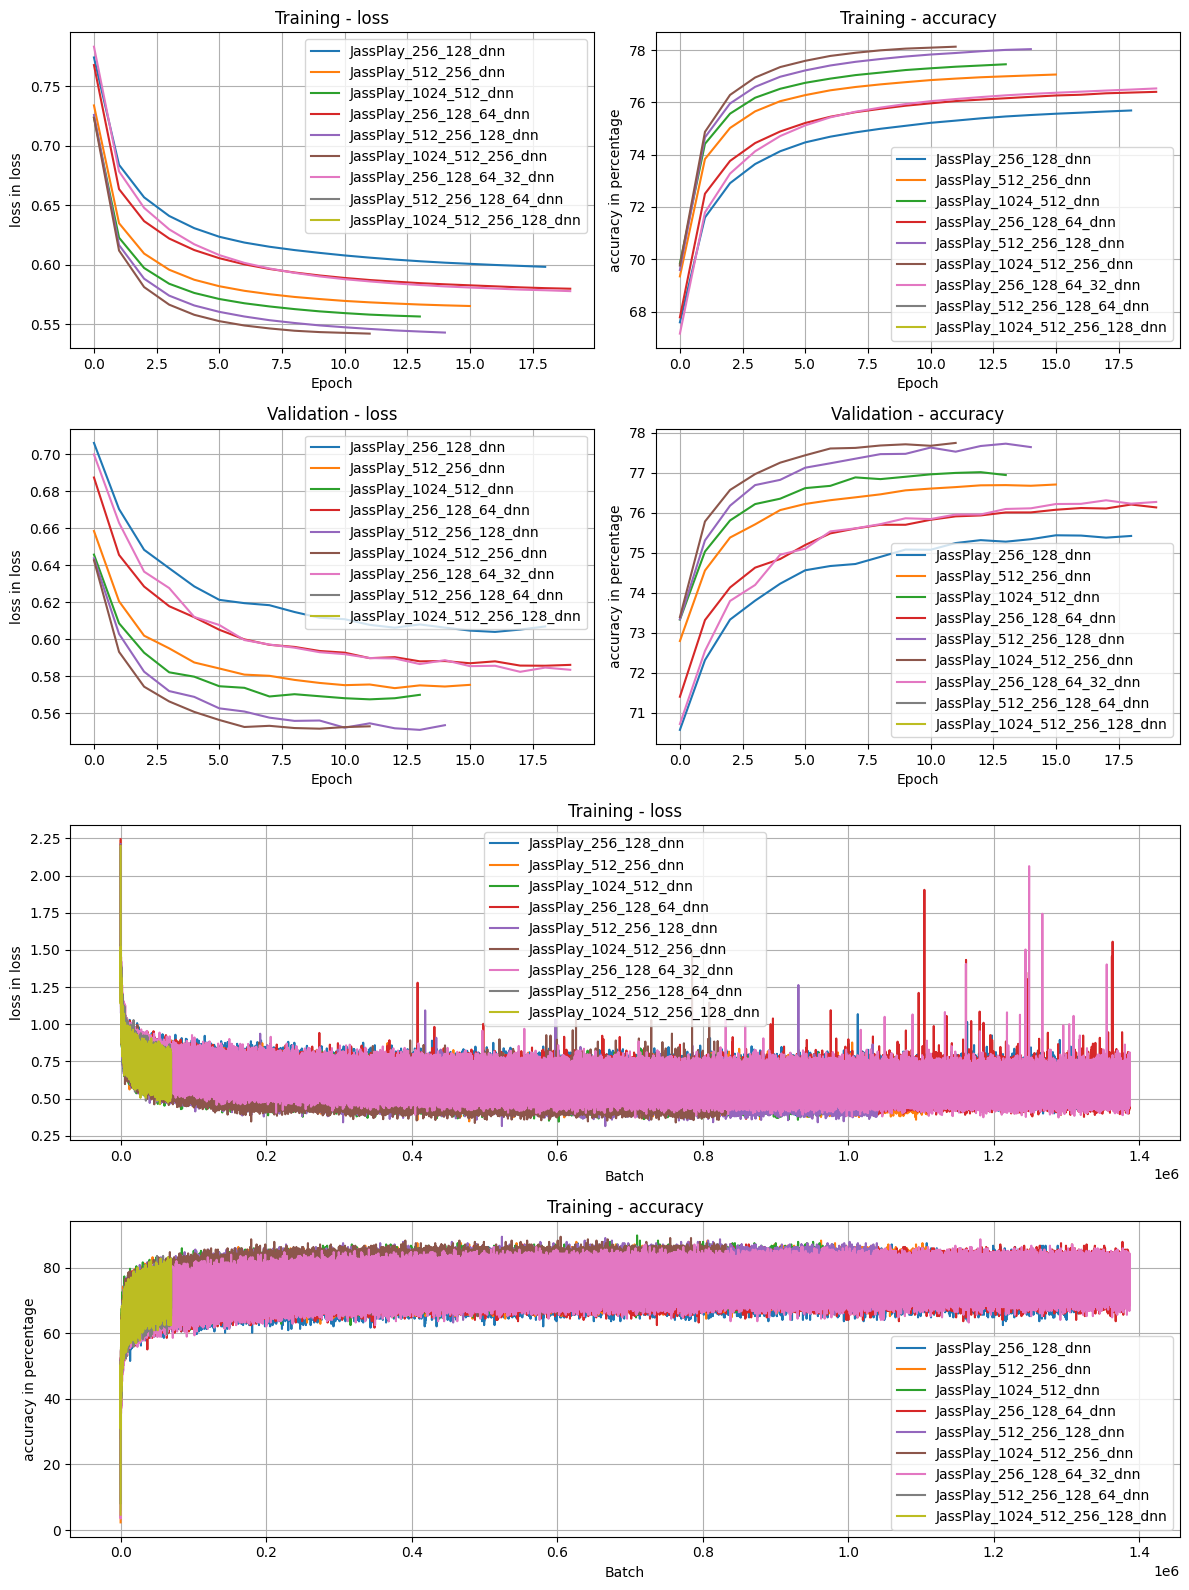

In [8]:
# create graphs
trainer.monitor.plot()

In [7]:
trainer.monitor.dump(dump_path=LOGS_PATH, filename="monitor")

In [9]:
# export the model to ONNX
ONNX_PATH = f"{MODLE_PATH}/{model.name}.onnx"
model = model_dnn.ModelDNN(
    name="JassPlay",
    input_size=72,
    embedding_size=13,
    hidden_size=[512, 256, 128],
    output_size=9,
)
model.load_state_dict(torch.load(f"{MODLE_PATH}/{model.name}.pth"))
onnxexporter.onnx_exporter(
    model=model,
    in_dim=72,
    output_path=ONNX_PATH
)

Exporting model to ONNX format...
Successfully converted and saved ONNX model to ./models/play/JassPlay_1024_512_256_128_dnn.onnx
